# Pratical Motivation
Use variables to predict the fatal percentage of an accident or incident. 
It will be formulated as the regression problem with both numerical value and categorical variables.

# Data Preparation 

In [16]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [17]:
data = pd.read_csv("/kaggle/input/aviation-accident-database-synopses/AviationData.csv",engine='python')  # engine for avoiding unicode error 
# pick relavant data 
data = data[['Investigation.Type','Aircraft.Damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.Flight',
            'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.Phase.of.Flight','Event.Date']]

data.head()

,Investigation.Type,Aircraft.Damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Event.Date
0,Accident,Substantial,Airplane,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF,2019-12-31
1,Accident,Destroyed,Airplane,1.0,Reciprocating,Personal,2.0,NaN,NaN,NaN,VMC,TAKEOFF,2019-12-31
2,Accident,Substantial,Airplane,1.0,NaN,Personal,NaN,NaN,NaN,2.0,NaN,NaN,2019-12-31
3,Accident,Substantial,Airplane,NaN,NaN,Personal,NaN,NaN,NaN,1.0,NaN,NaN,2019-12-30
4,NaN,Substantial,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-28


In [18]:
data.dtypes

Investigation.Type         object
Aircraft.Damage            object
Aircraft.Category          object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.Flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Event.Date                 object
dtype: object

In [19]:
data.shape

(84262, 13)

## Data Cleaning 
### Missing Values 
For the label variable, delete the rows with unknown value

In [20]:
data[data['Total.Fatal.Injuries']==0]

,Investigation.Type,Aircraft.Damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Event.Date
18197,Accident,Substantial,Helicopter,1.0,NaN,Other Work Use,0.0,0.0,0.0,3.0,VMC,NaN,2009-03-04
18264,Accident,Substantial,Helicopter,NaN,NaN,Unknown,0.0,0.0,0.0,18.0,VMC,NaN,2009-02-18
18277,Accident,Substantial,Airplane,1.0,NaN,NaN,0.0,0.0,3.0,0.0,VMC,NaN,2009-02-14
18388,Incident,Minor,Airplane,NaN,NaN,Personal,0.0,0.0,0.0,2.0,NaN,NaN,2009-01-10
18431,Accident,Substantial,Airplane,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,NaN,2008-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84250,Accident,Substantial,Airplane,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,TAKEOFF,1982-01-01
84251,Accident,Substantial,Airplane,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,LANDING,1982-01-01
84252,Accident,Substantial,NaN,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,CRUISE,1982-01-01
84253,Accident,Substantial,NaN,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,1982-01-01


In [21]:
data = data[data['Total.Fatal.Injuries'].notna()]
data

,Investigation.Type,Aircraft.Damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Event.Date
1,Accident,Destroyed,Airplane,1.0,Reciprocating,Personal,2.0,NaN,NaN,NaN,VMC,TAKEOFF,2019-12-31
5,Accident,Destroyed,Airplane,2.0,Turbo Prop,Executive/Corporate,5.0,2.0,2.0,NaN,IMC,TAKEOFF,2019-12-28
6,Accident,Substantial,Helicopter,1.0,Turbo Shaft,NaN,1.0,NaN,NaN,2.0,VMC,APPROACH,2019-12-25
10,Accident,Destroyed,Airplane,1.0,Reciprocating,Personal,1.0,NaN,NaN,NaN,NaN,APPROACH,2019-12-21
23,Accident,Destroyed,Airplane,1.0,Turbo Prop,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,2019-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,Accident,Destroyed,NaN,NaN,NaN,Personal,1.0,2.0,NaN,NaN,VMC,APPROACH,1979-08-02
84258,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,CRUISE,1977-06-19
84259,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,CRUISE,1974-08-30
84260,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,UNKNOWN,1962-07-19


For numerical variables as predicators, replace missing values by mean 

In [22]:
def check_null_values(data):
    print('=====Number of Missing Values for each Column=====')
    for col in data.columns:
        print(col,'=',data[col].isnull().sum())

check_null_values(data)

=====Number of Missing Values for each Column=====
Investigation.Type = 0
Aircraft.Damage = 1246
Aircraft.Category = 48657
Number.of.Engines = 2707
Engine.Type = 1573
Purpose.of.Flight = 1340
Total.Fatal.Injuries = 0
Total.Serious.Injuries = 6408
Total.Minor.Injuries = 7114
Total.Uninjured = 7205
Weather.Condition = 1236
Broad.Phase.of.Flight = 2811
Event.Date = 0


In [23]:
data['Total.Uninjured'].fillna(data['Total.Uninjured'].mean(), inplace=True)
data['Total.Minor.Injuries'].fillna(data['Total.Minor.Injuries'].mean(), inplace=True)
data['Total.Serious.Injuries'].fillna(data['Total.Serious.Injuries'].mean(), inplace=True)
data['Number.of.Engines'].fillna(data['Number.of.Engines'].mean(), inplace=True)

For categorical variables, treat missing values as a separate catogory

In [24]:
data['Aircraft.Category'].fillna('Unknown',inplace=True)

data['Engine.Type'].fillna('Others',inplace=True)
data['Engine.Type'].replace(['None','Unknown'],'Others')

data['Purpose.of.Flight'].fillna('Unknown',inplace=True)
data['Weather.Condition'].fillna('UNK',inplace=True)
data['Broad.Phase.of.Flight'].fillna('UNKNOWN',inplace=True)

### Encoding Categorical Variables 
(To present data exploration more intuitively, encoding will be done after that.)

In [25]:
# data['Investigation.Type'] = data['Investigation.Type'].astype('category').cat.codes
# data['Aircraft.Damage'] = data['Aircraft.Damage'].astype('category').cat.codes
# data['Aircraft.Category'] = data['Aircraft.Category'].astype('category').cat.codes
# data['Engine.Type'] = data['Engine.Type'].astype('category').cat.codes
# data['Purpose.of.Flight'] = data['Purpose.of.Flight'].astype('category').cat.codes
# data['Weather.Condition'] = data['Weather.Condition'].astype('category').cat.codes
# data['Broad.Phase.of.Flight'] = data['Broad.Phase.of.Flight'].astype('category').cat.codes

### Reformat Date  

In [26]:
data['year'] = [int(i.split('-')[0]) for i in data['Event.Date']]
data['month'] = [int(i.split('-')[1]) for i in data['Event.Date']]
data['day'] = [int(i.split('-')[2]) for i in data['Event.Date']]
del data['Event.Date']

### Result of Data Clearning 

In [27]:
data  # cleaned data set 

,Investigation.Type,Aircraft.Damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,year,month,day
1,Accident,Destroyed,Airplane,1.000000,Reciprocating,Personal,2.0,0.257191,0.374112,4.217756,VMC,TAKEOFF,2019,12,31
5,Accident,Destroyed,Airplane,2.000000,Turbo Prop,Executive/Corporate,5.0,2.000000,2.000000,4.217756,IMC,TAKEOFF,2019,12,28
6,Accident,Substantial,Helicopter,1.000000,Turbo Shaft,Unknown,1.0,0.257191,0.374112,2.000000,VMC,APPROACH,2019,12,25
10,Accident,Destroyed,Airplane,1.000000,Reciprocating,Personal,1.0,0.257191,0.374112,4.217756,UNK,APPROACH,2019,12,21
23,Accident,Destroyed,Airplane,1.000000,Turbo Prop,Unknown,1.0,0.257191,0.374112,4.217756,VMC,TAKEOFF,2019,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,Accident,Destroyed,Unknown,1.154327,Others,Personal,1.0,2.000000,0.374112,4.217756,VMC,APPROACH,1979,8,2
84258,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,IMC,CRUISE,1977,6,19
84259,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,3.0,0.257191,0.374112,4.217756,IMC,CRUISE,1974,8,30
84260,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,4.0,0.000000,0.000000,0.000000,UNK,UNKNOWN,1962,7,19


In [28]:
check_null_values(data)

=====Number of Missing Values for each Column=====
Investigation.Type = 0
Aircraft.Damage = 1246
Aircraft.Category = 0
Number.of.Engines = 0
Engine.Type = 0
Purpose.of.Flight = 0
Total.Fatal.Injuries = 0
Total.Serious.Injuries = 0
Total.Minor.Injuries = 0
Total.Uninjured = 0
Weather.Condition = 0
Broad.Phase.of.Flight = 0
year = 0
month = 0
day = 0


# Explore Analysis 
## Variable to Predict: Fatal Injuries 
There are many outliers, and they prove to affect the model's result.
**What causes such outliers?** 
+ Serious accidents/incidents are rare, and the data set is imbalance. 
+ Different types of aircrafts have different number of passengers

In [29]:
data['Total.Fatal.Injuries'].describe()

count    57059.000000
mean         0.847614
std          6.292468
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

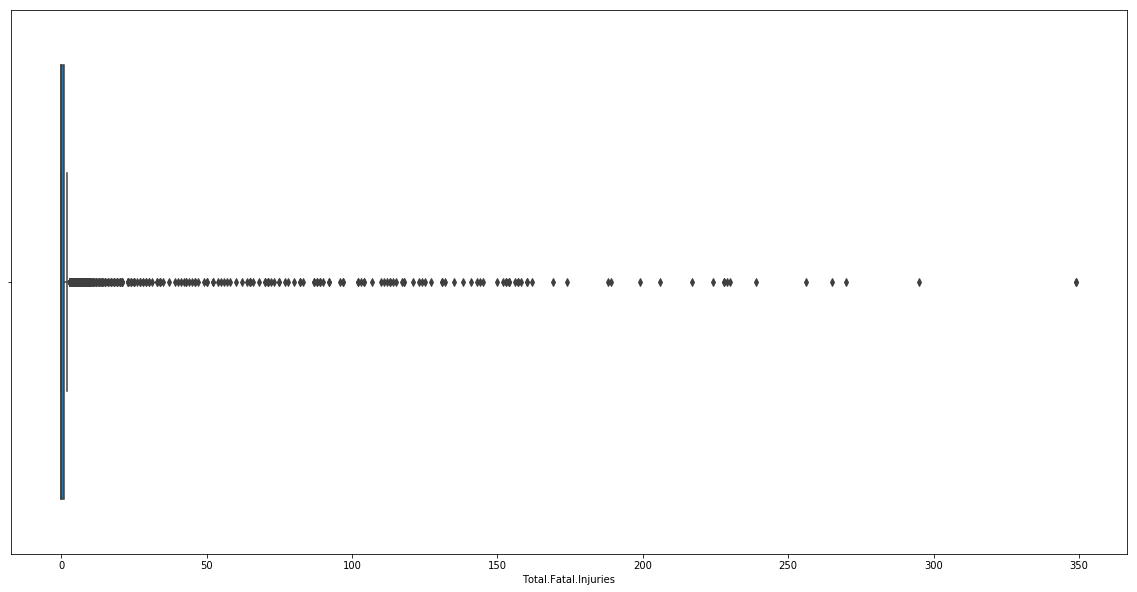

In [30]:
f,axes = plt.subplots(1,1,figsize=(20,10))
sb.boxplot(x=data['Total.Fatal.Injuries'], ax=axes)

### Transform the Variable into Fatal Percentage 

In [31]:
data['ratio'] = data['Total.Fatal.Injuries']/(data['Total.Uninjured']+
                                             data['Total.Serious.Injuries']+
                                             data['Total.Minor.Injuries']+
                                             data['Total.Fatal.Injuries'])

In [32]:
data[data['ratio'].isnull()]

,Investigation.Type,Aircraft.Damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,year,month,day,ratio
18823,Incident,NaN,Unknown,1.154327,Others,Unknown,0.0,0.0,0.0,0.0,VMC,LANDING,2008,9,22,NaN
18824,Incident,NaN,Unknown,1.154327,Others,Unknown,0.0,0.0,0.0,0.0,VMC,LANDING,2008,9,22,NaN
34980,Accident,Substantial,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,2000,9,5,NaN
35926,Accident,NaN,Unknown,1.154327,Unknown,Executive/Corporate,0.0,0.0,0.0,0.0,VMC,UNKNOWN,2000,5,8,NaN
38932,Incident,NaN,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,LANDING,1998,11,29,NaN
38946,Incident,Minor,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1998,11,27,NaN
39131,Incident,NaN,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1998,10,20,NaN
39132,Accident,Substantial,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1998,10,20,NaN
39155,Accident,Substantial,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1998,10,13,NaN
39198,Incident,Minor,Unknown,1.154327,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1998,10,8,NaN


Records with `ratio==NaN` are abnormal, i.e. all injury cases are 0, and too many unknown columns. Hence, they should be deleted. 

In [33]:
data = data[data['ratio'].notna()]

In [34]:
data['ratio'].describe()

count    57034.000000
mean         0.186466
std          0.348854
min          0.000000
25%          0.000000
50%          0.000000
75%          0.170968
max          1.000000
Name: ratio, dtype: float64

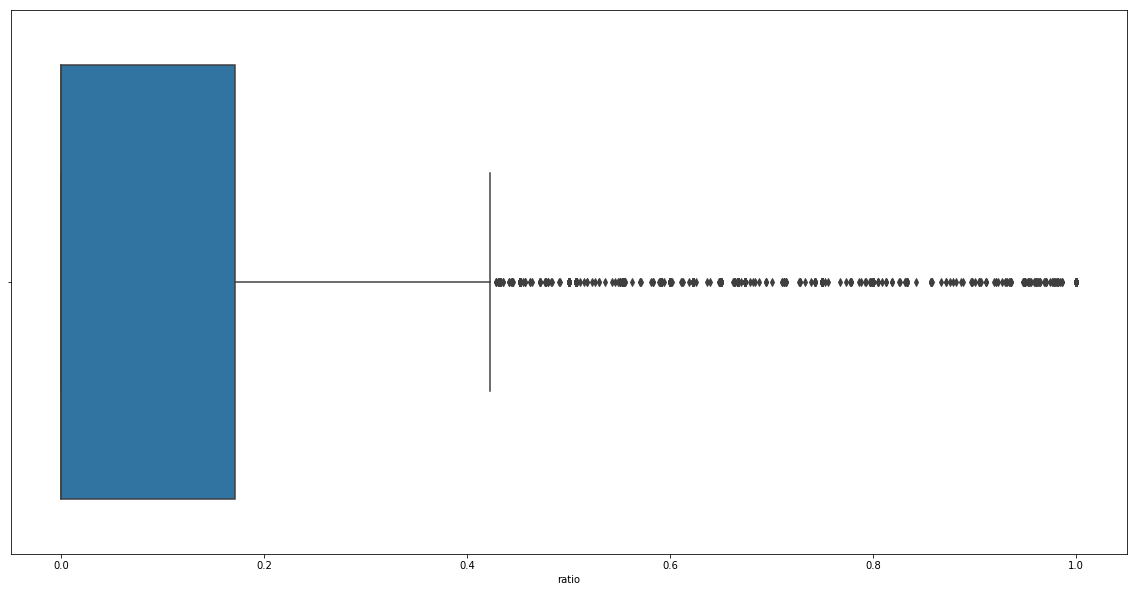

In [35]:
f,axes = plt.subplots(1,1,figsize=(20,10))
sb.boxplot(x=data['ratio'], ax=axes)

## Uninjured Case 

In [36]:
data['Total.Uninjured'].describe()

count    57034.000000
mean         4.219605
std         22.158297
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        528.000000
Name: Total.Uninjured, dtype: float64

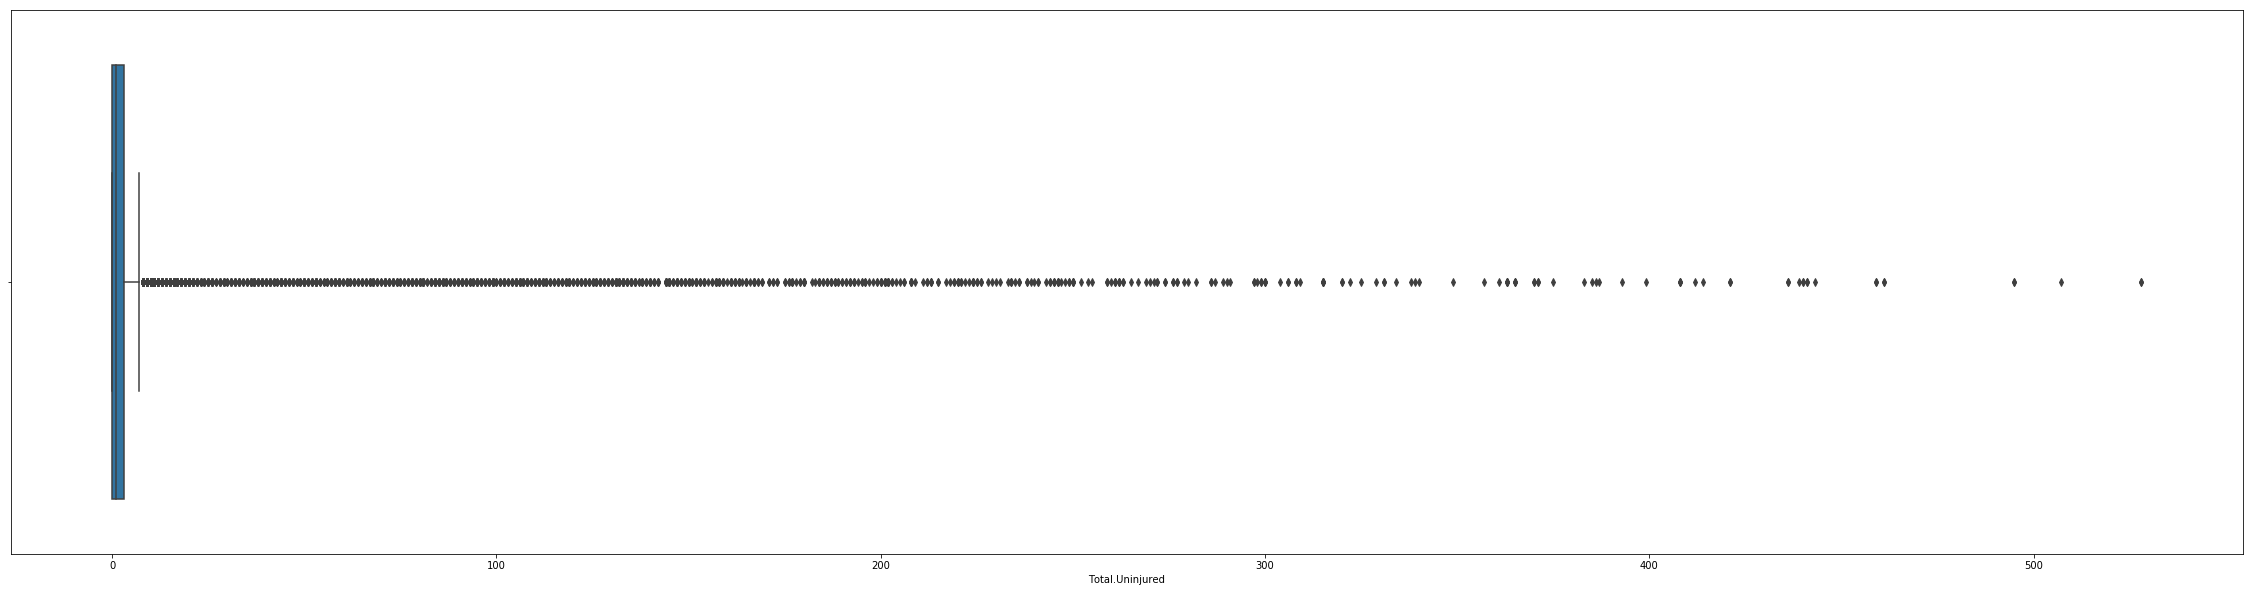

In [37]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x=data['Total.Uninjured'], ax=axes)

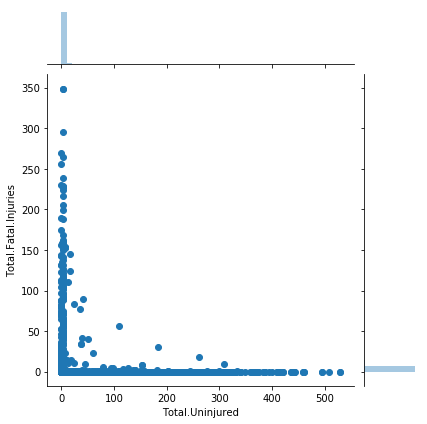

In [38]:
sb.jointplot(x='Total.Uninjured',y='Total.Fatal.Injuries',data=data)

## Serious Injured Case 

In [39]:
data['Total.Serious.Injuries'].describe()

count    57034.000000
mean         0.257304
std          1.297780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.257191
max        111.000000
Name: Total.Serious.Injuries, dtype: float64

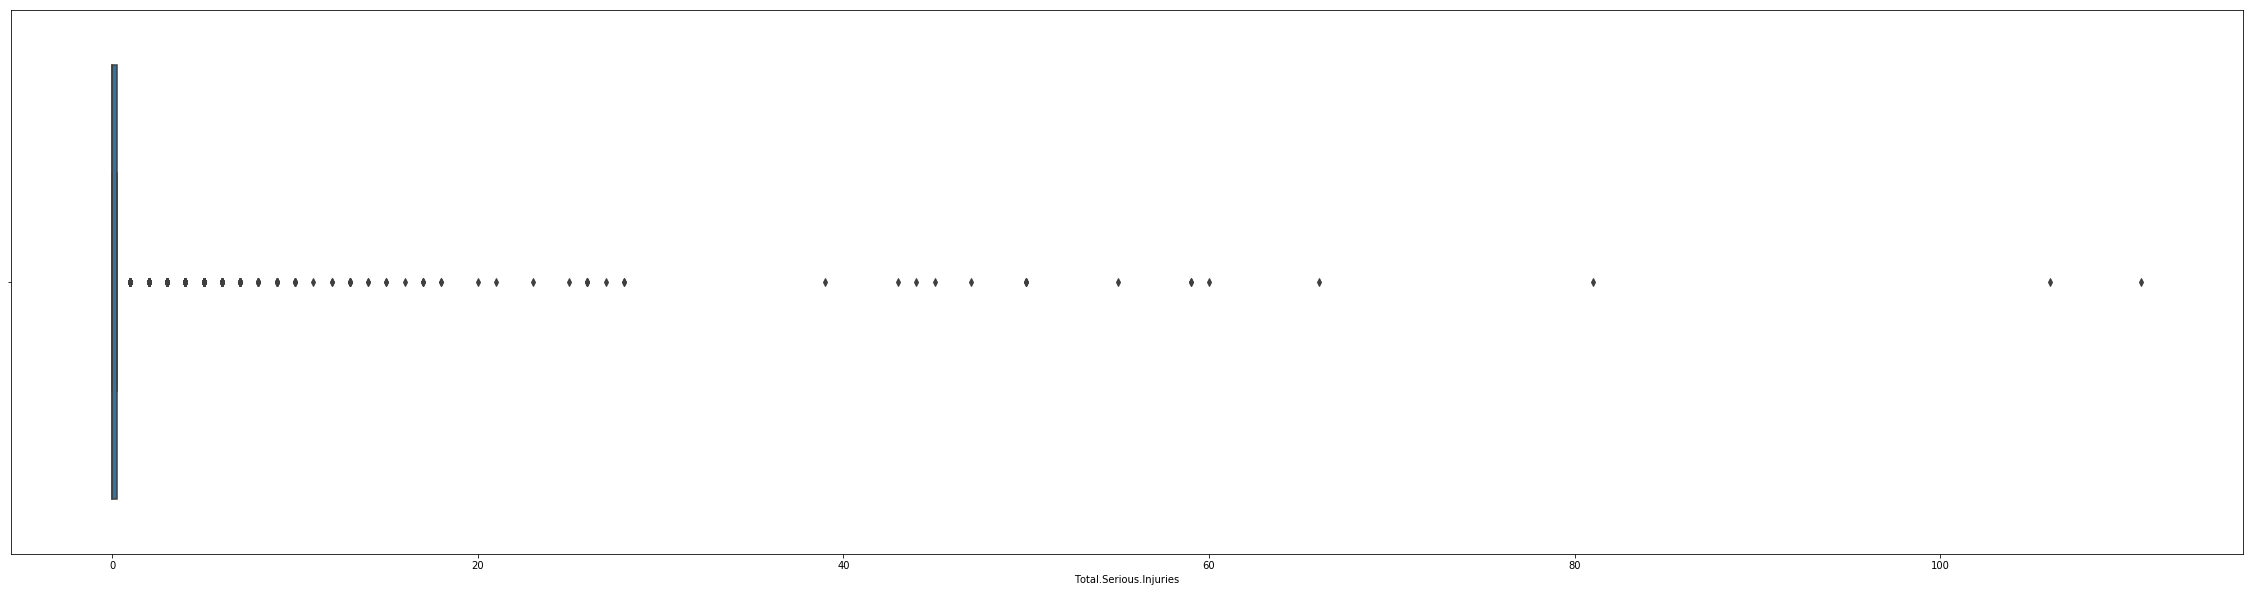

In [40]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x='Total.Serious.Injuries',data=data, ax=axes)

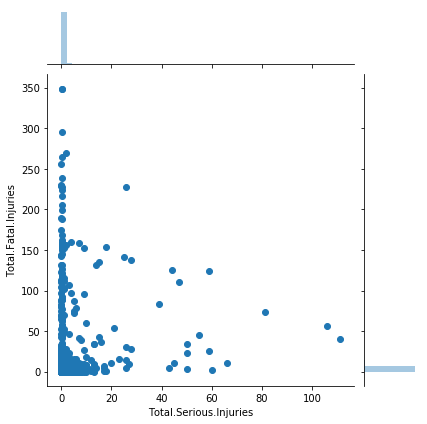

In [41]:
sb.jointplot(x='Total.Serious.Injuries',y='Total.Fatal.Injuries',data=data)

## Mild Injuries

In [42]:
data['Total.Minor.Injuries'].describe()

count    57034.000000
mean         0.374276
std          1.889469
min          0.000000
25%          0.000000
50%          0.000000
75%          0.374112
max        171.000000
Name: Total.Minor.Injuries, dtype: float64

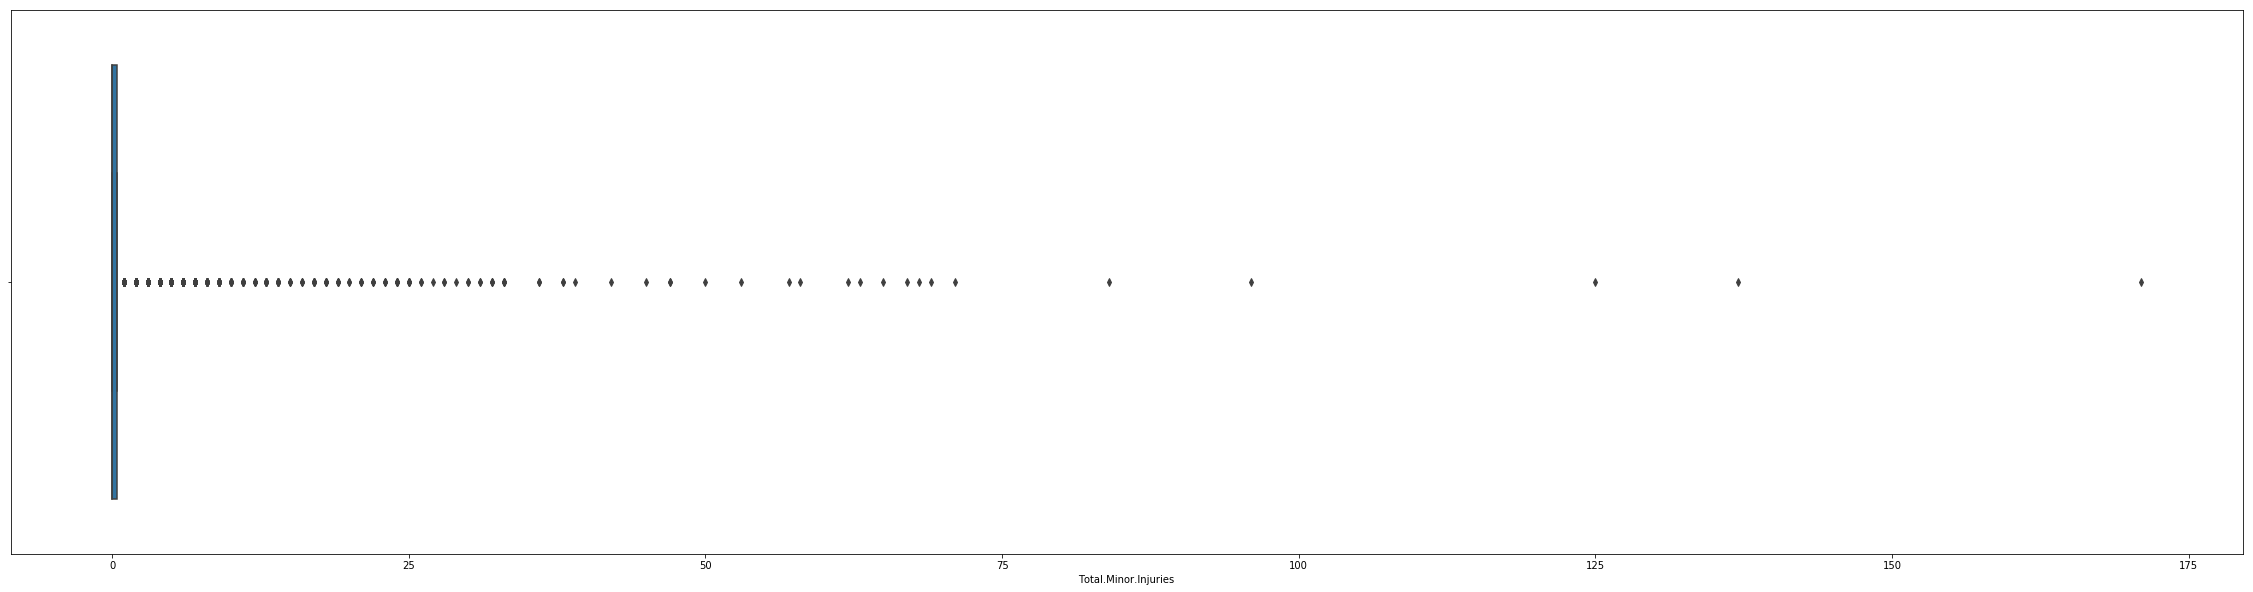

In [43]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x='Total.Minor.Injuries',data=data, ax=axes)

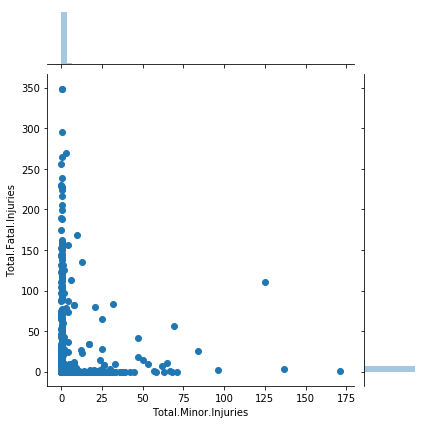

In [44]:
sb.jointplot(x='Total.Minor.Injuries',y='Total.Fatal.Injuries',data=data)

## Investigation Type 

In [45]:
data['Investigation.Type'].value_counts()

Accident    55457
Incident     1577
Name: Investigation.Type, dtype: int64

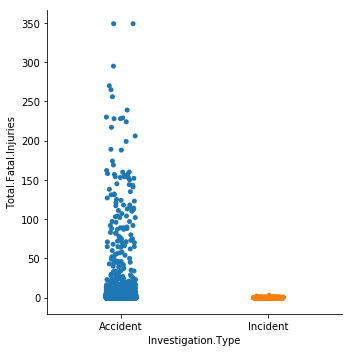

In [46]:
sb.catplot(x='Investigation.Type',y='Total.Fatal.Injuries',data=data)

## Aircraft Damage 

In [47]:
data['Aircraft.Damage'].value_counts()

Substantial    37319
Destroyed      17028
Minor           1451
Name: Aircraft.Damage, dtype: int64

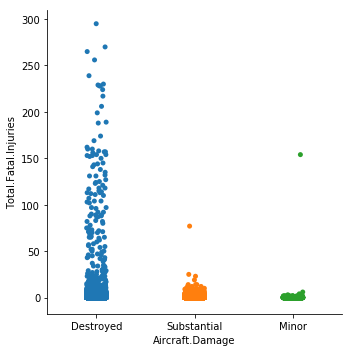

In [48]:
sb.catplot(x='Aircraft.Damage',y='Total.Fatal.Injuries',data=data)

## Aircraft Category

In [49]:
data['Aircraft.Category'].value_counts()

Unknown              48637
Airplane              7200
Helicopter             947
Glider                 120
Balloon                 44
Gyrocraft               32
Weight-Shift            26
Ultralight              10
Gyroplane               10
Powered Parachute        7
Rocket                   1
Name: Aircraft.Category, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


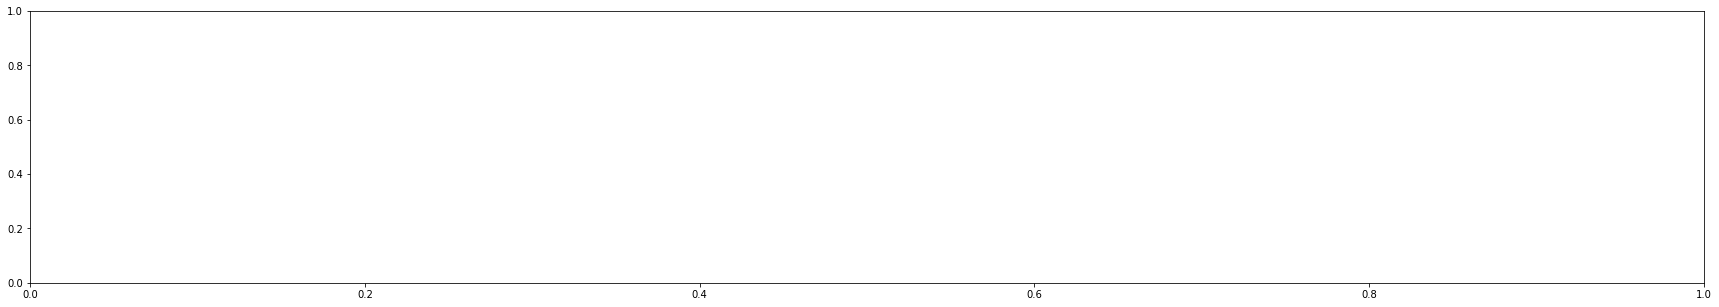

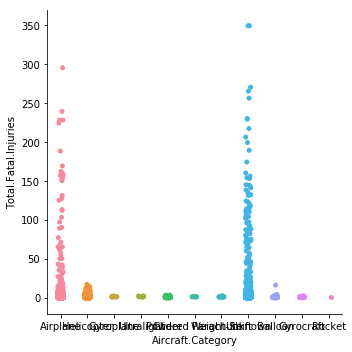

In [50]:
f,axes = plt.subplots(1,1,figsize=(30,5))
sb.catplot(x='Aircraft.Category',y='Total.Fatal.Injuries',data=data,ax=axes)

## Engine Type 

In [51]:
data['Aircraft.Category'].value_counts()

Unknown              48637
Airplane              7200
Helicopter             947
Glider                 120
Balloon                 44
Gyrocraft               32
Weight-Shift            26
Ultralight              10
Gyroplane               10
Powered Parachute        7
Rocket                   1
Name: Aircraft.Category, dtype: int64

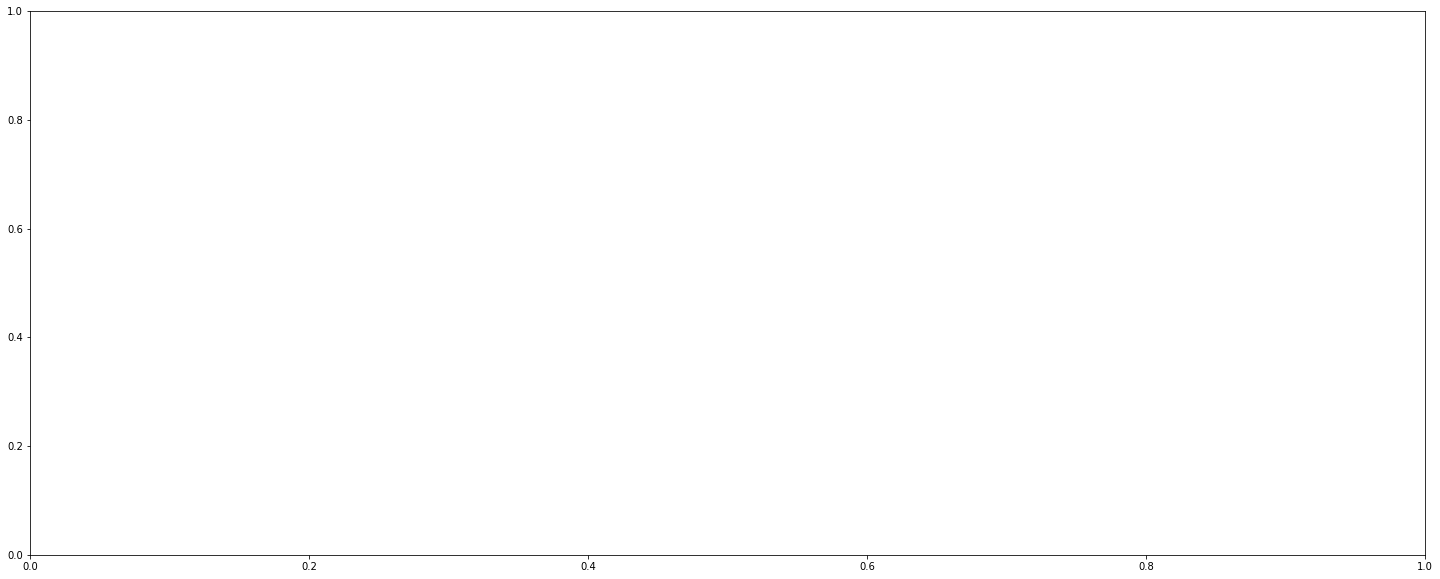

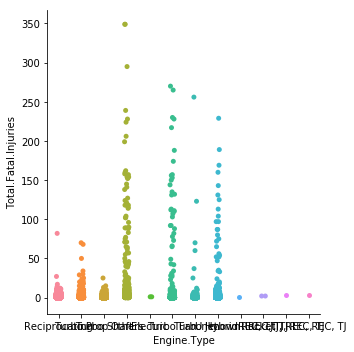

In [52]:
f,axes = plt.subplots(1,1,figsize=(25,10))
sb.catplot(x='Engine.Type',y='Total.Fatal.Injuries',data=data,ax=axes)

## Flight Purpose 

In [53]:
data['Purpose.of.Flight'].value_counts()

Personal                     32142
Unknown                       7732
Instructional                 6426
Aerial Application            3272
Business                      3256
Positioning                    983
Other Work Use                 773
Ferry                          667
Public Aircraft                538
Aerial Observation             488
Executive/Corporate            424
Flight Test                     80
Air Race/Show                   74
Skydiving                       59
External Load                   27
Public Aircraft - Federal       23
Banner Tow                      16
Glider Tow                      15
Public Aircraft - State         14
Firefighting                    12
Public Aircraft - Local         10
Air Drop                         3
Name: Purpose.of.Flight, dtype: int64

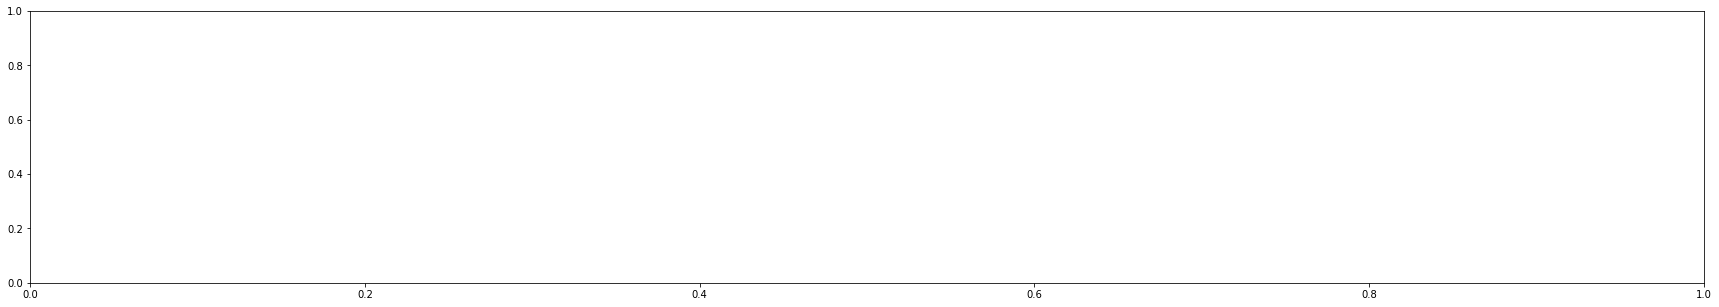

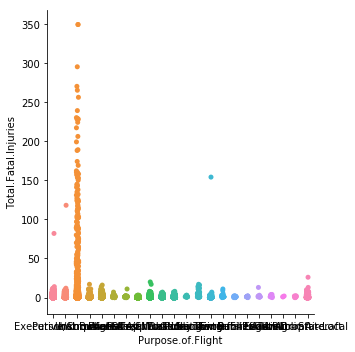

In [54]:
f,axes = plt.subplots(1,1,figsize=(30,5))
sb.catplot(x='Purpose.of.Flight',y='Total.Fatal.Injuries',data=data,ax=axes)

## Weather Condition 

In [55]:
data['Weather.Condition'].value_counts()

VMC    49849
IMC     5094
UNK     2091
Name: Weather.Condition, dtype: int64

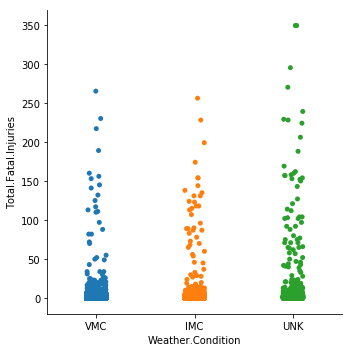

In [56]:
sb.catplot(x='Weather.Condition',y='Total.Fatal.Injuries',data=data)

## Phase 

In [57]:
data['Broad.Phase.of.Flight'].value_counts()

LANDING        11971
TAKEOFF        11142
CRUISE          9111
MANEUVERING     8093
APPROACH        6019
UNKNOWN         3507
CLIMB           1856
DESCENT         1714
TAXI            1527
GO-AROUND       1222
STANDING         755
OTHER            117
Name: Broad.Phase.of.Flight, dtype: int64

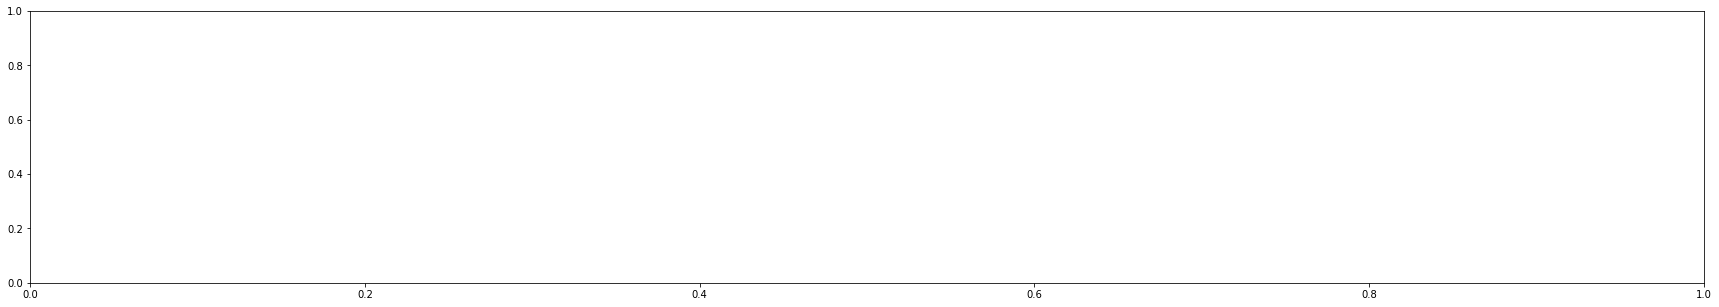

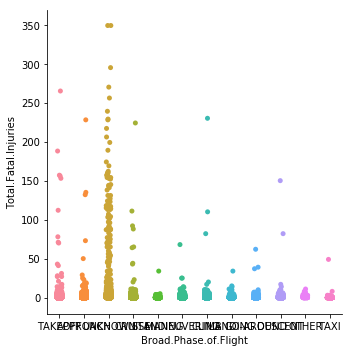

In [58]:
f,axes = plt.subplots(1,1,figsize=(30,5))
sb.catplot(x='Broad.Phase.of.Flight',y='Total.Fatal.Injuries',data=data,ax=axes)

## Time 

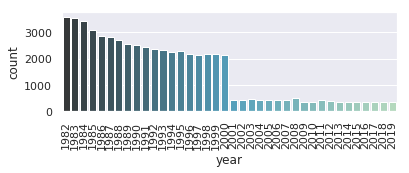

In [59]:
sb.set(style="darkgrid")
plt.subplot(211)
g = sb.countplot(x="year", palette="GnBu_d", data=data,order=np.arange(1982,2020))
a = plt.setp(g.get_xticklabels(), rotation=90)

---
###  Correlation 

In [60]:
data.corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,month,day,ratio
Number.of.Engines,1.000000,0.071338,0.033136,0.085838,0.405756,0.006237,-0.017810,-0.003332,0.037836
Total.Fatal.Injuries,0.071338,1.000000,0.177762,0.055781,-0.005755,0.108366,0.010917,0.000689,0.215298
Total.Serious.Injuries,0.033136,0.177762,1.000000,0.370665,0.035954,0.064396,0.008837,0.003518,-0.021950
Total.Minor.Injuries,0.085838,0.055781,0.370665,1.000000,0.175193,0.029379,0.008946,0.007415,-0.069906
Total.Uninjured,0.405756,-0.005755,0.035954,0.175193,1.000000,0.015745,-0.003094,-0.003426,-0.081684
year,0.006237,0.108366,0.064396,0.029379,0.015745,1.000000,0.020559,0.000508,0.081574
month,-0.017810,0.010917,0.008837,0.008946,-0.003094,0.020559,1.000000,-0.020155,0.019833
day,-0.003332,0.000689,0.003518,0.007415,-0.003426,0.000508,-0.020155,1.000000,-0.002549
ratio,0.037836,0.215298,-0.021950,-0.069906,-0.081684,0.081574,0.019833,-0.002549,1.000000


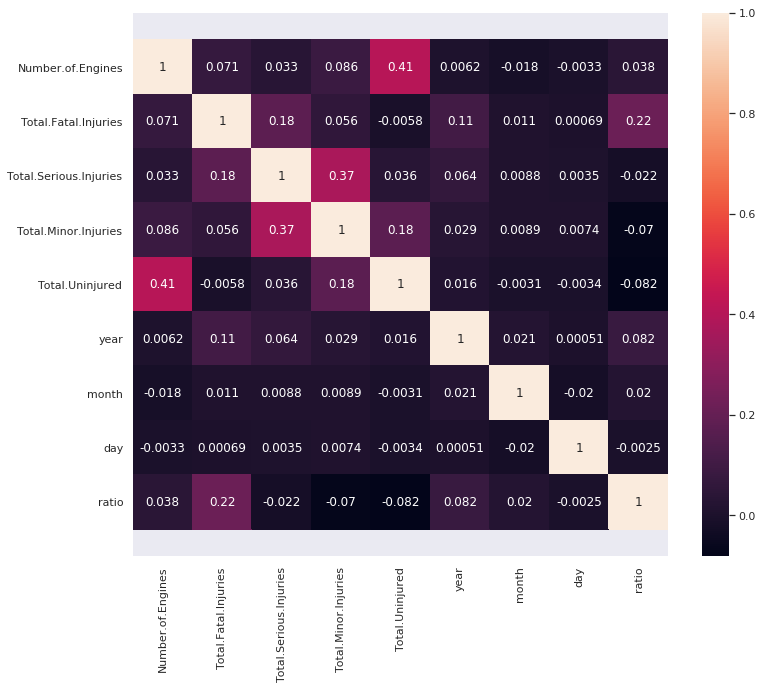

In [61]:
def plot_correlation_map( df ):
    corr = df.corr()
    f,axes = plt.subplots(figsize=(12,10))
    g = sb.heatmap(corr,annot=True,ax=axes)
    bottom, top = g.get_ylim()
    g.set_ylim(bottom+0.5,top-0.5)    # fix annotation not centered 

    
plot_correlation_map(data)

In [62]:
# integer encoding 
data['Investigation.Type'] = data['Investigation.Type'].astype('category').cat.codes
data['Aircraft.Damage'] = data['Aircraft.Damage'].astype('category').cat.codes
data['Aircraft.Category'] = data['Aircraft.Category'].astype('category').cat.codes
data['Engine.Type'] = data['Engine.Type'].astype('category').cat.codes
data['Purpose.of.Flight'] = data['Purpose.of.Flight'].astype('category').cat.codes
data['Weather.Condition'] = data['Weather.Condition'].astype('category').cat.codes
data['Broad.Phase.of.Flight'] = data['Broad.Phase.of.Flight'].astype('category').cat.codes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



# Algorithm Optimization and Machine Learning 

## Prepare date set for Cross-Validation 

In [63]:
# prepare pre
X = data[['Investigation.Type','Aircraft.Damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.Flight',
            'Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.Phase.of.Flight',
            'year','month','day']]

y = data['ratio']
# split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (42775, 14)
Training Labels Shape: (42775,)
Testing Features Shape: (14259, 14)
Testing Labels Shape: (14259,)


## Linear Regression 

In [64]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_)), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  -0.013659674954628054
Coefficients of Regression 	: a =  [-3.50594287e-01 -1.97621593e-01  8.02002916e-04  1.47705606e-02
 -4.08734288e-03  2.41853214e-03 -1.73221725e-02 -8.70729314e-03
 -1.31551307e-03 -9.72949084e-02 -9.98860867e-04  3.10170002e-04
  1.59763436e-03  5.67796893e-05]



,Predictors,Coefficients
0,Investigation.Type,-0.350594
1,Aircraft.Damage,-0.197622
2,Aircraft.Category,0.000802
3,Number.of.Engines,0.014771
4,Engine.Type,-0.004087
5,Purpose.of.Flight,0.002419
6,Total.Serious.Injuries,-0.017322
7,Total.Minor.Injuries,-0.008707
8,Total.Uninjured,-0.001316
9,Weather.Condition,-0.097295


### Visualization and Performace Evaluation  

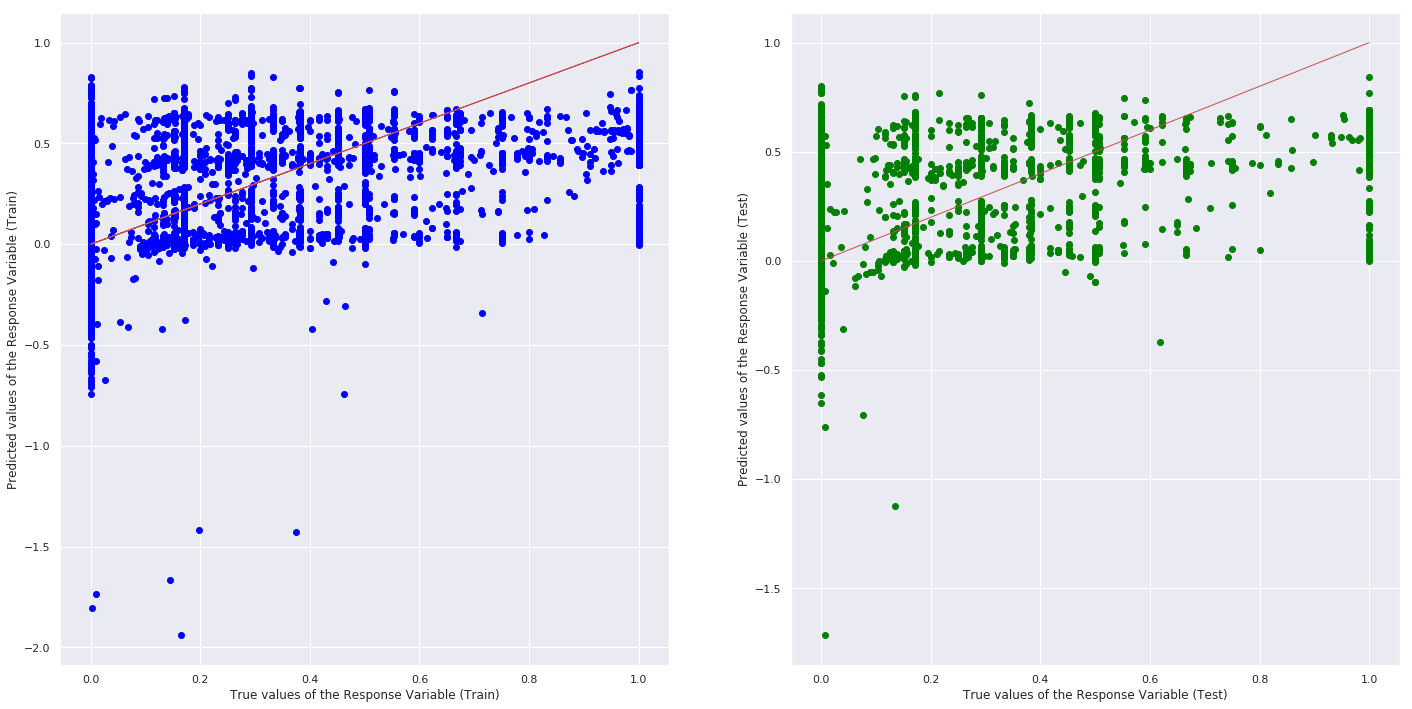

In [65]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [66]:
from math import sqrt
def evaluate(predicted,actual):
    size = actual.size
    mse = ((predicted-actual)**2).sum()/size
    print('MSE =',mse)
    rmse = sqrt(mse)
    print('RMSE =',rmse)
    mae = abs(predicted-actual).sum()/size
    print('MAE =',mae)
    var = ((actual-np.mean(actual))**2).sum()/size
    R2 = 1-mse/var
    print('R^2 =',R2)

print('Train Set')
evaluate(linreg.predict(X_train),y_train)
print('Test Set')
evaluate(linreg.predict(X_test),y_test)

Train Set
MSE = 0.07579656651329439
RMSE = 0.2753117623954603
MAE = 0.1845846531125593
R^2 = 0.3785362288309362
Test Set
MSE = 0.0756527215368384
RMSE = 0.27505039817611315
MAE = 0.18500201119416354
R^2 = 0.374222344908399


## Random Forest 

In [67]:
# base model 
from sklearn.ensemble import RandomForestRegressor

base = RandomForestRegressor(n_estimators=100)
base.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
print('Train Set')
evaluate(base.predict(X_train),y_train)
print('Test Set')
evaluate(base.predict(X_test),y_test)

Train Set
MSE = 0.001129555199623523
RMSE = 0.03360885597016838
MAE = 0.012300842522219739
R^2 = 0.9907386618366343
Test Set
MSE = 0.007495221019055727
RMSE = 0.08657494452239474
MAE = 0.032814222237200735
R^2 = 0.9380016774226152


### RadomizedSearch

In [69]:
# Randomized Search to find optimal parameters 
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestRegressor()

param_grid = {
    'min_samples_split':[2,5,7],
    'max_depth':[5,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'min_samples_leaf': [2, 3, 4],
    'n_estimators': [100, 500, 1000, 1500]
}

search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=3,verbose=2,n_jobs = -1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 15}

### Improved Model Training 

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1500, bootstrap=True,
                           max_features='auto', min_samples_split=5,
                           min_samples_leaf=2, max_depth=15)
# training 
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Performace Evaluation 

In [72]:
print('Train Set')
evaluate(rf.predict(X_train),y_train)
print('Test Set')
evaluate(rf.predict(X_test),y_test)

Train Set
MSE = 0.0040197778956069935
RMSE = 0.06340171839632577
MAE = 0.02346535104271056
R^2 = 0.967041431489805
Test Set
MSE = 0.006989178294371542
RMSE = 0.08360130557815196
MAE = 0.031632381112797266
R^2 = 0.9421875179739672


### Interpretation 
#### Visualization 

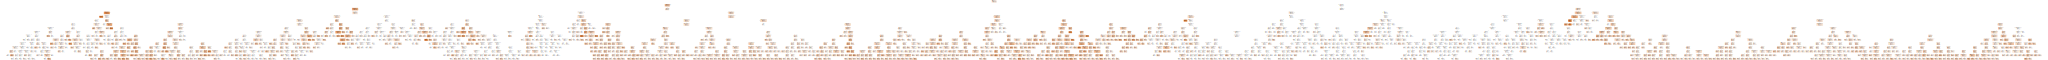

In [73]:
from sklearn.tree import export_graphviz
import graphviz
import os 

treedot = export_graphviz(rf.estimators_[5],                                      # the model
                          feature_names = X_train.columns,          # the features 
                          filled = True,                                # node colors
                          rounded = False,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

#### Variable Importance 

In [74]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Aircraft.Damage Importance: 0.36
Variable: Total.Serious.Injuries Importance: 0.22
Variable: Total.Uninjured Importance: 0.18
Variable: Total.Minor.Injuries Importance: 0.17
Variable: year Importance: 0.05
Variable: Purpose.of.Flight Importance: 0.01
Variable: month Importance: 0.01
Variable: day Importance: 0.01
Variable: Investigation.Type Importance: 0.0
Variable: Aircraft.Category Importance: 0.0
Variable: Number.of.Engines Importance: 0.0
Variable: Engine.Type Importance: 0.0
Variable: Weather.Condition Importance: 0.0
Variable: Broad.Phase.of.Flight Importance: 0.0


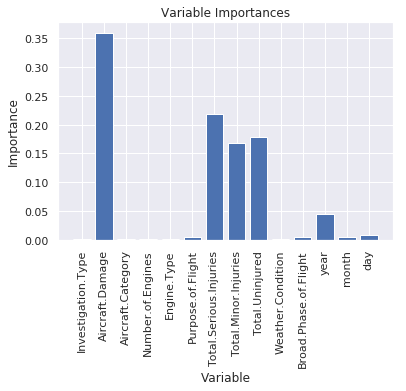

In [75]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, X_train.columns, rotation='vertical')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');